In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [13]:
from ultralytics import YOLO
import cv2
import os
from datetime import datetime
from google.colab.patches import cv2_imshow

In [14]:

def save_detection_results(results, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)


    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    for i, result in enumerate(results):
        annotated_frame = result.plot()  # Draw bounding boxes and labels
        filename = f"{output_dir}/detection_{timestamp}_{i}.jpg"
        cv2.imwrite(filename, annotated_frame)
        print(f"Saved detection result to {filename}")


0: 448x640 2 persons, 1 cat, 1 dog, 1 potted plant, 1009.5ms
Speed: 3.5ms preprocess, 1009.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Detected: person with confidence 0.93
Detected: cat with confidence 0.80
Detected: person with confidence 0.77
Detected: dog with confidence 0.76
Detected: potted plant with confidence 0.47


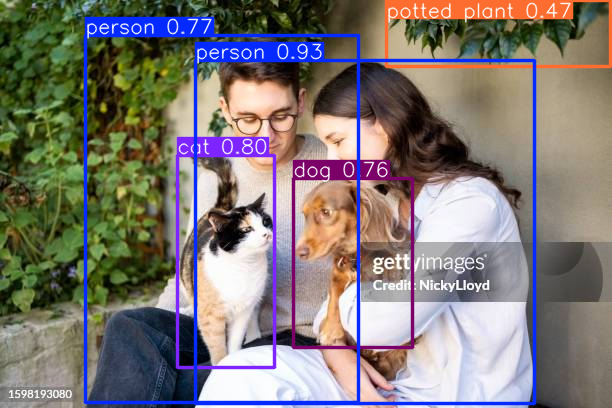

Saved detection result to output/detection_20250312_001448_0.jpg


In [15]:

def detect_objects_in_image(image_path, model_name="yolov8m.pt"):

    model = YOLO(model_name)  # Pre-trained on COCO dataset (80 classes)


    if not os.path.exists(image_path):
        print(f"Error: Image file '{image_path}' not found.")
        return


    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image '{image_path}'.")
        return


    results = model(image)


    for result in results:
        boxes = result.boxes
        for box in boxes:
            class_name = model.names[int(box.cls)]
            confidence = box.conf.item()
            print(f"Detected: {class_name} with confidence {confidence:.2f}")


    annotated_frame = results[0].plot()
    cv2_imshow(annotated_frame)


    save_detection_results(results)

if __name__ == "__main__":
    image_path = "/content/gettyimages-1598193080-612x612.jpg"


    detect_objects_in_image(image_path, model_name="yolov8m.pt")